#This is DL on Fashion MNIST dataset


In [0]:
#importing the required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#loading the data provided by keras

data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#as the dataset is loaded we need to assign proper values to the labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


print(train_images[7])            #Notice the picture data is from 0-255

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

In [0]:
# shrinking the values in 0-1 from 0-255

train_images = train_images/255.0
test_images = test_images/255.0

In [5]:
print(train_images[7])          # data is shrinked from 0-1

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039216 0.

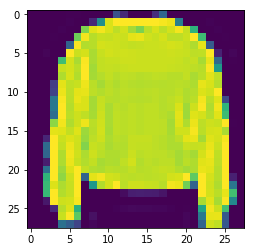

In [6]:
plt.imshow(train_images[7])       



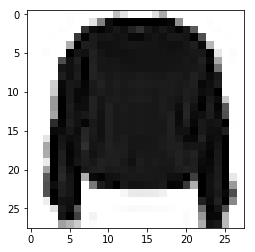

In [7]:
#will convert these images to grayscale
plt.imshow(train_images[7], cmap=plt.cm.binary)


Now this is easy to recognize that this is a T-shirt.

#Here we build & train a deepLearning model

In [8]:
#building
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(512, activation="relu"),
                          keras.layers.Dropout(0.1),
                          keras.layers.Dense(254, activation="relu"),
                          keras.layers.Dropout(0.1),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dropout(0.1),
                          keras.layers.Dense(64, activation="relu"),
                          keras.layers.Dropout(0.1),
                          keras.layers.Dense(32, activation="relu"),
                          keras.layers.Dropout(0.1),
                          keras.layers.Dense(10, activation="softmax"),
 ])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_images, train_labels, epochs = 100, batch_size=200, validation_split= 0.1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 6s 112us/sample - loss: 0.7093 - acc: 0.7506 - val_loss: 0.4180 - val_acc: 0.8517
Epoch 2/100
54000/54000 [==============================] - 5s 99us/sample - loss: 0.4447 - acc: 0.8456 - val_loss: 0.3959 - val_acc: 0.8557
Epoch 3/100
54000/54000 [==============================] - 5s 97us/sample - loss: 0.3897 - acc: 0.8645 - val_loss: 0.3608 - val_acc: 0.8712
Epoch 4/100
54000/54000 [==============================] - 5s 97us/sample - loss: 0.3594 - acc: 0.8724 - val_loss: 0.3433 - val_acc: 0.8775
Epoch 5/100
54000/54000 [==============================] - 5s 97us/sample - loss: 0.3407 - acc: 0.8789 - val_loss: 0.3268 - val_acc: 0.8785
Epoch 6/100
54000/54000 [==============================] - 5s 94us/sample - loss: 0.3204 - acc: 0.8854 - val_loss: 0.3293 - val_acc:

In [9]:
#testing
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Accuracy obtained:", test_acc)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.4898 - acc: 0.8962
Accuracy obtained: 0.8962
